# Lexicon Based Approach

In [1]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

E:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
tweets = api.search('Union Budget 2019', count=100)
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data

,Tweets
0,RT @NikiBhandary: Right measures to ensure sus...
1,RT @projects_today: Union Budget 2019 | Right ...
2,RT @Omkar_Raii: #UnionBudget2019 has set the s...
3,"Right measures to ensure sustainable growth, b..."
4,दलित एवं आदिवासी अधिकार समूहों का आरोप- 'मोदी ...
5,Breaking News | Business\n\n*2019 Union Budget...
6,RT @IDSAIndia: Dr Sanjaya Baru @Barugaru1 made...
7,RT @BrookingsIndia: Other than lowering GST on...
8,Other than lowering GST on electric vehicles a...
9,#UnionBudget2019 declares Pension scheme - PMK...


In [11]:
sid = SentimentIntensityAnalyzer()


listy = []
pos,neg,neu=0,0,0

for index, row in data.iterrows():
    ss = sid.polarity_scores(row["Tweets"])
    if ss['compound'] > 0.0 : 
        pos+=1 
    elif ss['compound'] < 0.0 : 
        neg+=1
    else: 
        neu+=1
    listy.append(ss)
sentiment_scores={"Positive":pos,"Negetive":neg,"Neutral":neu}
se = pd.Series(listy)
data['polarity'] = se.values

print(sentiment_scores["Positive"])
print(sentiment_scores["Negetive"])
print(sentiment_scores["Neutral"])
sentiment_scores.values()
listy

30
14
46


[{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.296},
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.078, 'neu': 0.82, 'pos': 0.102, 'compound': 0.1531},
 {'neg': 0.085, 'neu': 0.805, 'pos': 0.11, 'compound': 0.1531},
 {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.2263},
 {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'com

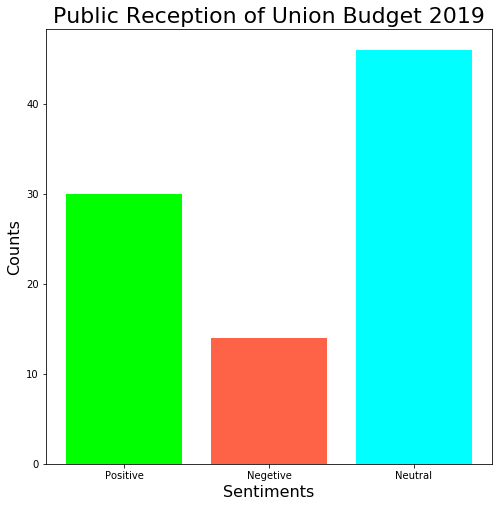

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
plt.bar(range(len(sentiment_scores)),list(sentiment_scores.values()),tick_label=list(sentiment_scores.keys()),color=['lime', 'tomato', 'cyan'])
plt.xlabel('Sentiments',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Public Reception of Union Budget 2019', fontsize=22)
plt.show()